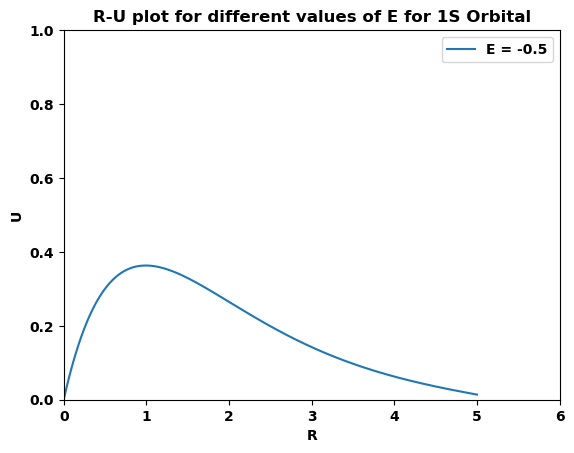

In [65]:
import numpy as np
import matplotlib.pyplot as plt

h_bar = 1.0
mass = 1.0
h = 0.001
n = 5000
r = np.zeros(n+1)
u = np.zeros(n+1)  
E=-0.5
u[0] = h
u[1] = 2 * h

    
l = 0

def f(r):
    return 2 * (E + 1/r - (l * (l+1) / (2 * r * r)))

for i in range(1, n):
    r[i] = i * h
    u[i + 1] = 2 * u[i] - u[i - 1] - f(i * h) * u[i] * h * h

plt.plot(r[0:n], u[0:n], label='E = -0.5')

plt.xlim(0,6)
plt.ylim(0, 1)
plt.xlabel('R')
plt.ylabel('U')
plt.title('R-U plot for different values of E for 1S Orbital')
plt.legend()
plt.show()


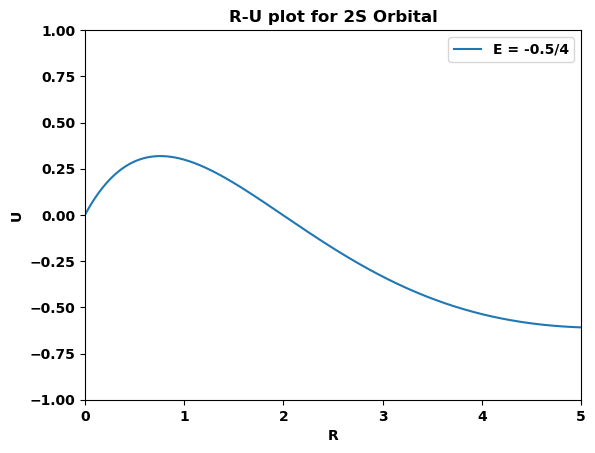

In [99]:
import numpy as np
import matplotlib.pyplot as plt

E= -0.5/4
h_bar = 1.0  
mass = 1.0 
h=0.001
n = 5000
r = np.zeros(n+1)
u= np.zeros(n+1)
u[0] = h
u[1] = 2*h
l=0
def f(r):
    return 2 * (E + 1 /r -(l * (l + 1)) / (2*(r**2)))

 
for i in range(1, n):
    r[i]=i*h
    u[i + 1] = 2 * u[i] - u[i - 1] - f(i*h)*u[i]*h*h

plt.plot(r[0:n],u[0:n], label='E = -0.5/4')
plt.xlim(0, 5) 
plt.ylim(-1, 1)
plt.xlabel('R')
plt.ylabel('U')
plt.title('R-U plot for 2S Orbital')
plt.legend()
plt.show()

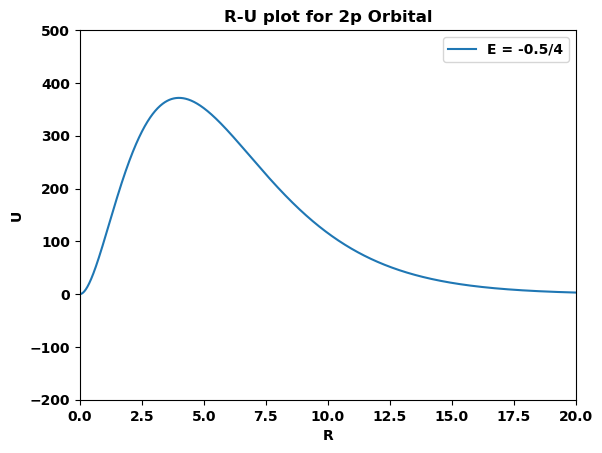

In [98]:
import numpy as np
import matplotlib.pyplot as plt

E = -0.5/4
h_bar = 1.0  
mass = 1.0 
h = 0.01
n = 5000
r = np.zeros(n + 1)
u = np.zeros(n + 1)
r[0]=0
u[0] = h
u[1] = 2 * h
l = 1

def f(r):
    return 2 * (E + 1 /r -(l * (l + 1)) / (2*(r**2)))

for i in range(1, n):
    r[i] = i * h
    u[i + 1] = 2 * u[i] - u[i - 1] - f(r[i]) * u[i] * h * h

plt.plot(r[0:n], u[0:n], label='E = -0.5/4')
plt.xlim(0, 20)
plt.ylim(-200, 500)
plt.xlabel('R')
plt.ylabel('U')
plt.title('R-U plot for 2p Orbital')
plt.legend()
plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_27156\554046654.py:21: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt((arr_xy[0] - arr[i][j][0])*2 + (arr_xy[1] - arr[i][j][1])*2)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_27156\554046654.py:30: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt((arr_xy[0] - arr[i][j][0])*2 + (arr_xy[1] - arr[i][j][1])*2)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_27156\554046654.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  ans += 24 * (2 * (1/r)*14 - (1/r)*8) * (arr_xy[0] - arr[i][j][0])
C:\Users\Aryan\AppData\Local\Temp\ipykernel_27156\554046654.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  ans += 24 * (2 * (1/r)*14 - (1/r)*8) * (arr_xy[0] - arr[i][j][0])
C:\Users\Aryan\AppData\Local\Temp\ipykernel_27156\554046654.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  ans += 24 * (2 * (1/r)*14 - (1/r)*8) * (arr_xy[1] - arr[i][j][1])
C:\Users\Aryan\AppData\Local\T

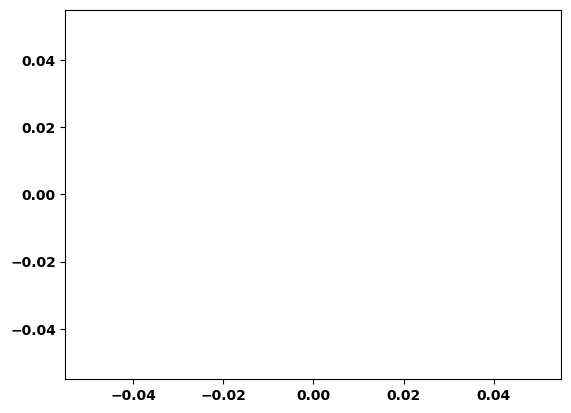

In [5]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

h = 0.01
matrix = []  
for i in range(10): 
    row = []  
    for j in range(10): 
        element = (i+1, j+1)  
        row.append(element)  
    matrix.append(row)  

V0 = np.zeros((10, 10, 2))

def Fx(arr, arr_xy):
    ans = 0
    for i in range(10):
        for j in range(10):
            if not np.array_equal(arr_xy, arr[i][j]):
                r = np.sqrt((arr_xy[0] - arr[i][j][0])*2 + (arr_xy[1] - arr[i][j][1])*2)   
                ans += 24 * (2 * (1/r)*14 - (1/r)*8) * (arr_xy[0] - arr[i][j][0])
    return ans

def Fy(arr, arr_xy):
    ans = 0
    for i in range(10):
        for j in range(10):
            if not np.array_equal(arr_xy, arr[i][j]):
                r = np.sqrt((arr_xy[0] - arr[i][j][0])*2 + (arr_xy[1] - arr[i][j][1])*2)
                ans += 24 * (2 * (1/r)*14 - (1/r)*8) * (arr_xy[1] - arr[i][j][1])
    return ans


newM = np.zeros((10, 10, 2))
for i in range(10):
    for j in range(10):
        newM[i][j][0] = matrix[i][j][0] + h * V0[i][j][0] + 0.5 * h**2 * Fx(matrix, matrix[i][j])
        newM[i][j][1] = matrix[i][j][1] + h * V0[i][j][1] + 0.5 * h**2 * Fy(matrix, matrix[i][j])

time_arr = np.arange(0, 4, h)     
temperature = []
for time in time_arr:
    temp = np.zeros((10, 10, 2))
    v_sum=0
    for i in range(10):
        for j in range(10):
            temp[i][j][0] = 2 * newM[i][j][0] - matrix[i][j][0] + h*h*Fx(newM, newM[i][j])
            temp[i][j][1] = 2 * newM[i][j][1] - matrix[i][j][1] + h*h*Fy(newM, newM[i][j])
            

            V0[i][j][0] = (temp[i][j][0] - matrix[i][j][0]) * 0.5 / h
            V0[i][j][1] = (temp[i][j][1] - matrix[i][j][1]) * 0.5 / h
            v_sum +=np.sqrt( V0[i][j][0]*2 + V0[i][j][1]*2 )
            
            
    temperature.append(v_sum / (3*((100)-1)))   
    matrix=newM
    newM=temp     

plt.plot(time_arr, temperature)
plt.show()

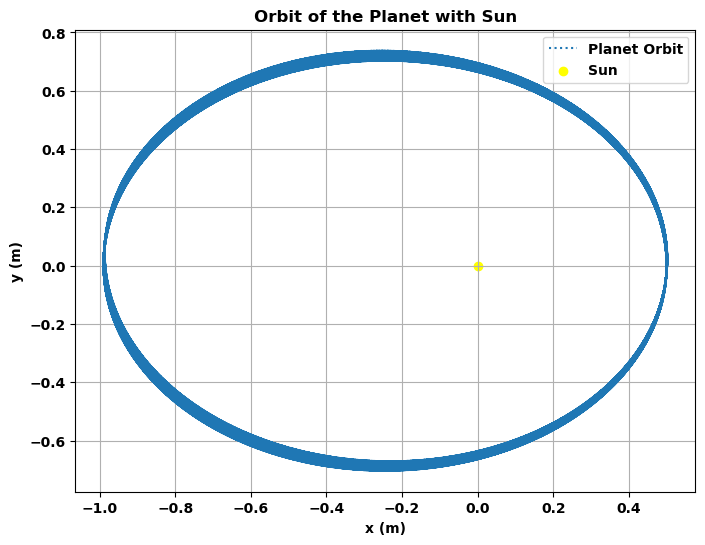

In [19]:
import numpy as np
import matplotlib.pyplot as plt


G = 1 
M = 1  


r0 = np.array([0.5, 0])  
v0 = np.array([0, 1.63])  
sun_pos = np.array([0, 0]) 

t = 1000
h = 0.01 
timesteps = int(t/ h)  
r = np.zeros((timesteps, 2))  
v = np.zeros((timesteps, 2))  
r[0] = r0
v[0] = v0

for i in range(1, timesteps):

    v_half = v[i-1] + 0.5 * dt * acceleration(r[i-1])
    r[i] = r[i-1] + dt * v_half
    v[i] = v_half + 0.5 * dt * acceleration(r[i])


def acceleration(r):
    r_norm = np.linalg.norm(r)
    return -G * M / r_norm**3 * r


plt.figure(figsize=(8, 6))
plt.plot(r[:, 0], r[:, 1], linestyle='dotted', label='Planet Orbit') 
plt.scatter(sun_pos[0], sun_pos[1], color='yellow', marker='o', label='Sun') 
plt.title('Orbit of the Planet with Sun')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.legend()
plt.show()
